#**ELECTRICITY CONSUMPTION (HouseHold Power Consumption)**

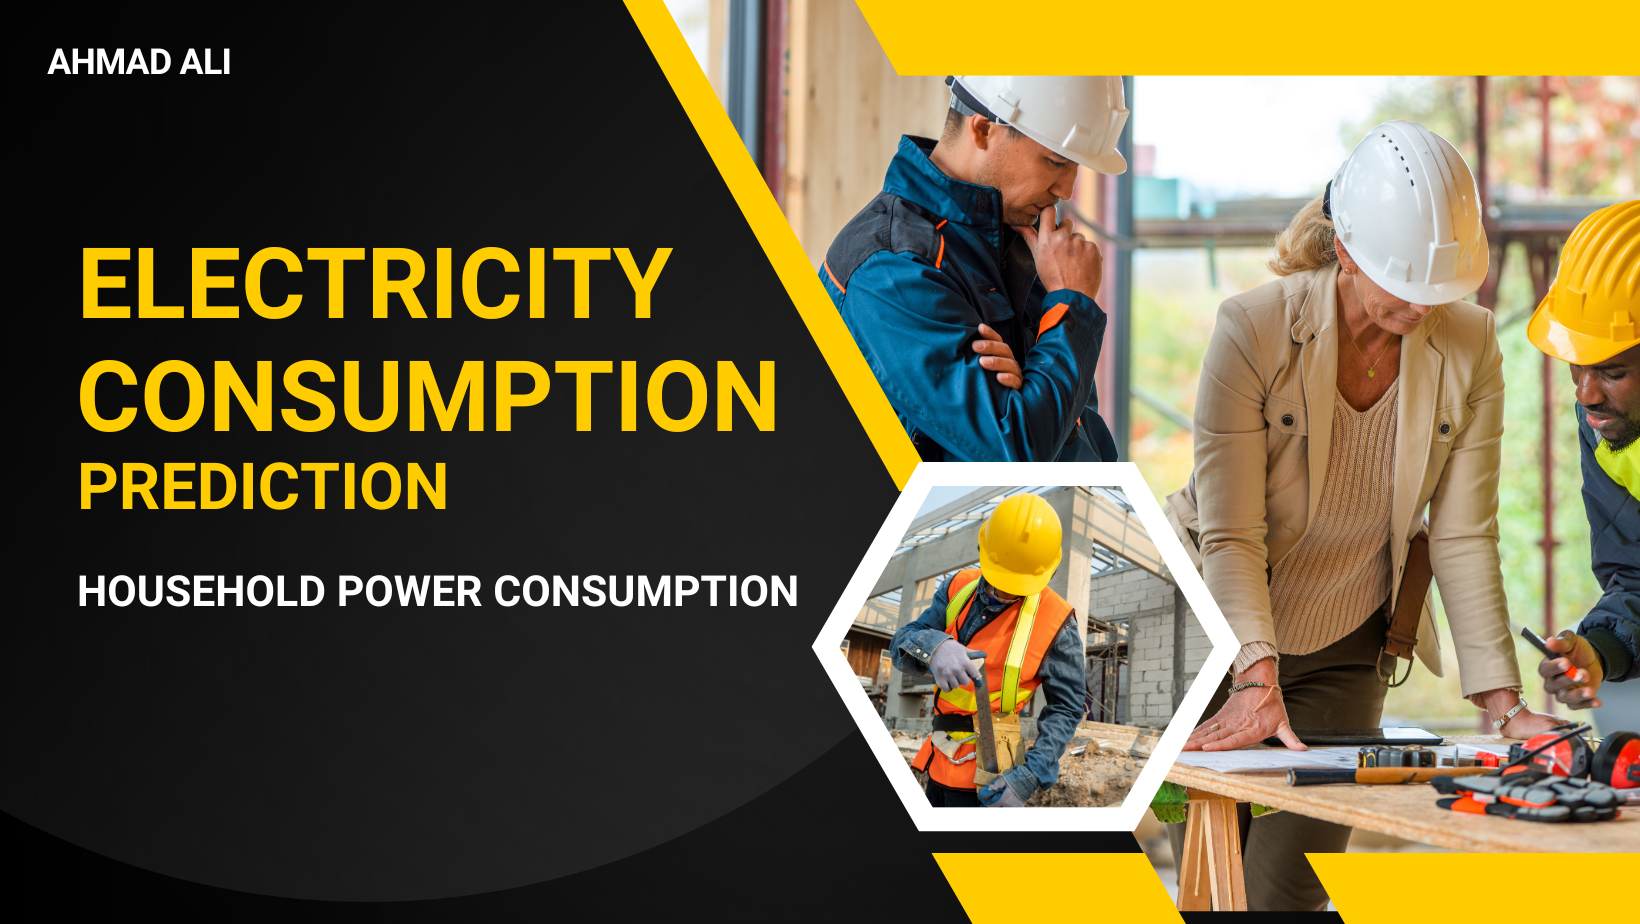

In [1]:
# Importing necessary libraries

# Importing NumPy for numerical operations
import numpy as np

# Importing Pandas for data manipulation and analysis
import pandas as pd

# Importing Matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing Seaborn for statistical data visualization
import seaborn as sns

# Importing seasonal decomposition from statsmodels for time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Importing functions to plot autocorrelation and partial autocorrelation from statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing the Augmented Dickey-Fuller test for stationarity testing from statsmodels
from statsmodels.tsa.stattools import adfuller

# Importing ARIMA model for time series forecasting from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Importing mean squared error for model evaluation from sklearn
from sklearn.metrics import mean_squared_error

# Importing datetime for date and time manipulation
from datetime import datetime

# Importing warnings library to suppress warnings
import warnings
warnings.filterwarnings('ignore')  # Ignoring all warnings for cleaner output


In [3]:
# Reading the dataset from a CSV file into a DataFrame using Pandas
full_data = pd.read_csv('/content/household_power_consumption.csv')


In [4]:
# Checking the dimensions of the DataFrame (number of rows and columns)
full_data.shape


(1048575, 9)

In [5]:
# Displaying the first five rows of the DataFrame to get an overview of the data
full_data.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [6]:
# Retrieving the column names of the DataFrame to understand the structure of the dataset
full_data.columns


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
# Displaying a concise summary of the DataFrame, including the data types and non-null values
full_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [8]:
# Convert the 'Time' column to datetime format
full_data['Time'] = pd.to_datetime(full_data['Time'])

# Set the 'Time' column as the index of the DataFrame
full_data.set_index('Time', inplace=True)


In [9]:
# Convert the 'Date' column to datetime format in the DataFrame
full_data['Date'] = pd.to_datetime(full_data['Date'])


In [10]:
# Assuming 'full_data' is your DataFrame and you want to convert these columns to float
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Use pd.to_numeric to convert these columns to float, coercing errors to NaN
full_data[columns_to_convert] = full_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [11]:
# Assuming 'full_data' is your DataFrame and you want to convert these columns to float
columns_to_convert = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Use pd.to_numeric to convert these columns to float
full_data[columns_to_convert] = full_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [12]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2024-07-06 17:24:00 to 2024-07-06 21:38:00
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1048575 non-null  datetime64[ns]
 1   Global_active_power    1044506 non-null  float64       
 2   Global_reactive_power  1044506 non-null  float64       
 3   Voltage                1044506 non-null  float64       
 4   Global_intensity       1044506 non-null  float64       
 5   Sub_metering_1         1044506 non-null  float64       
 6   Sub_metering_2         1044506 non-null  float64       
 7   Sub_metering_3         1044506 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 72.0 MB


In [13]:
# Check for duplicates
full_data.duplicated().sum()

# Remove duplicates if any
df = full_data[~full_data.duplicated()]

In [14]:
# Handle missing values if any
full_data.isnull().sum()

# Drop rows with missing values
full_data.dropna(inplace=True)

In [15]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1044506 entries, 2024-07-06 17:24:00 to 2024-07-06 21:38:00
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1044506 non-null  datetime64[ns]
 1   Global_active_power    1044506 non-null  float64       
 2   Global_reactive_power  1044506 non-null  float64       
 3   Voltage                1044506 non-null  float64       
 4   Global_intensity       1044506 non-null  float64       
 5   Sub_metering_1         1044506 non-null  float64       
 6   Sub_metering_2         1044506 non-null  float64       
 7   Sub_metering_3         1044506 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 71.7 MB


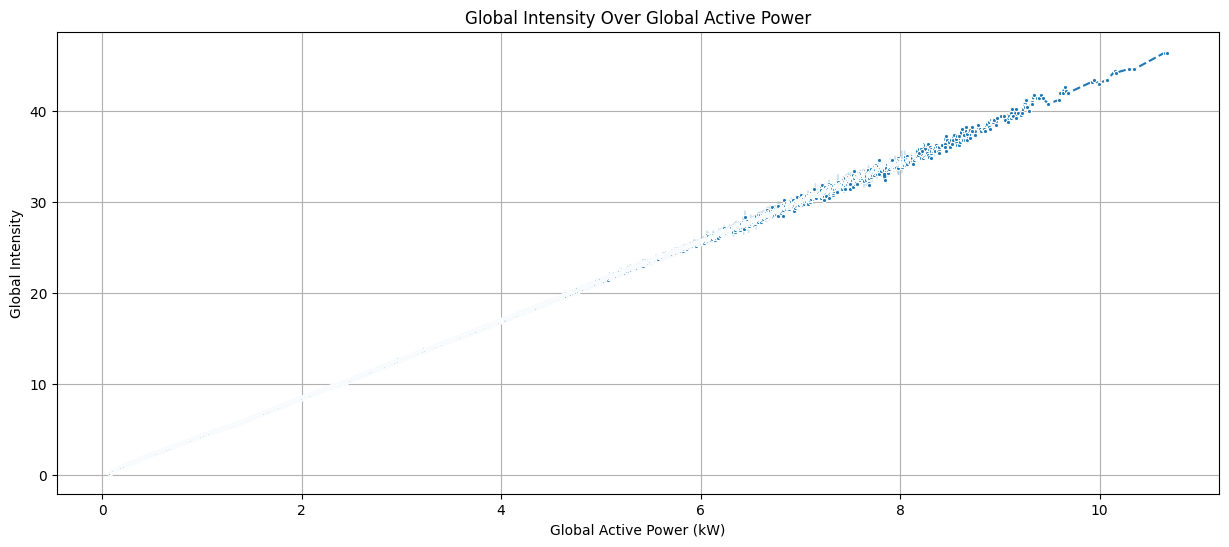

In [17]:
# Visualizing relationship between Global_active_power and Global_intensity

# Setting up the figure size
plt.figure(figsize=(15, 6))

# Creating a line plot of Global_active_power against Global_intensity
sns.lineplot(x=full_data['Global_active_power'], y=full_data['Global_intensity'], marker='.', linestyle='--')

# Adding title and labels
plt.title('Global Intensity Over Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Global Intensity')

# Adding grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()


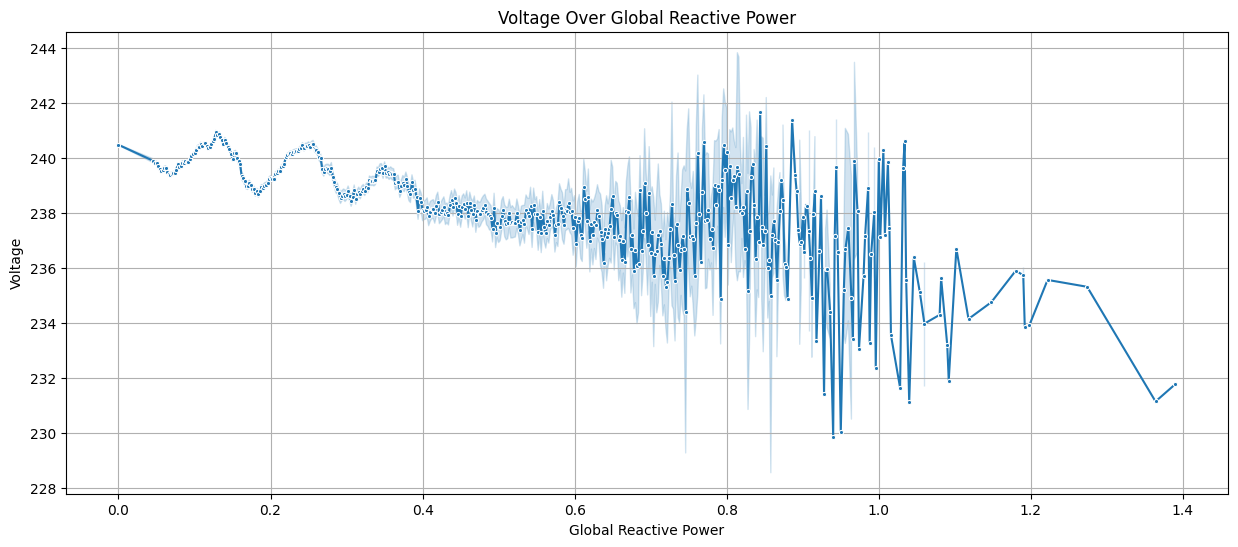

In [18]:
# Visualizing relationship between Global_reactive_power and Voltage

# Setting up the figure size
plt.figure(figsize=(15, 6))

# Creating a line plot of Global_reactive_power against Voltage
sns.lineplot(x=full_data['Global_reactive_power'], y=full_data['Voltage'], marker='.', linestyle='-')

# Adding title and labels
plt.title('Voltage Over Global Reactive Power')
plt.xlabel('Global Reactive Power')
plt.ylabel('Voltage')

# Adding grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()


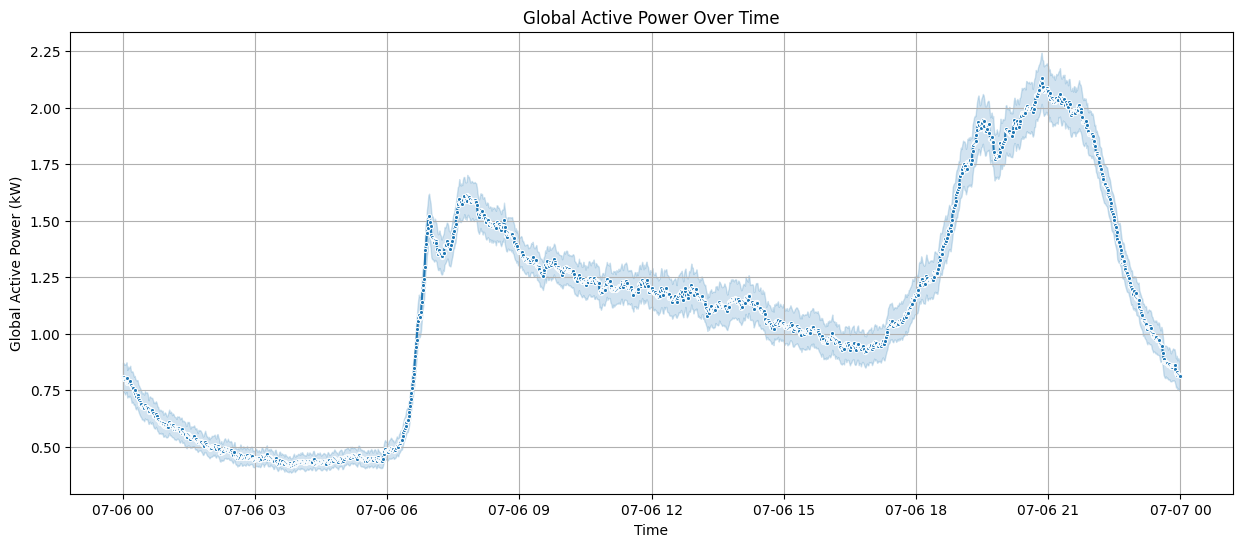

In [19]:
# Plotting Global_active_power over time using Seaborn

# Setting up the figure size
plt.figure(figsize=(15, 6))

# Creating a line plot of Global_active_power against time (index)
sns.lineplot(x=full_data.index, y='Global_active_power', data=full_data, marker='.', linestyle='-')

# Adding title and labels
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')

# Adding grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()


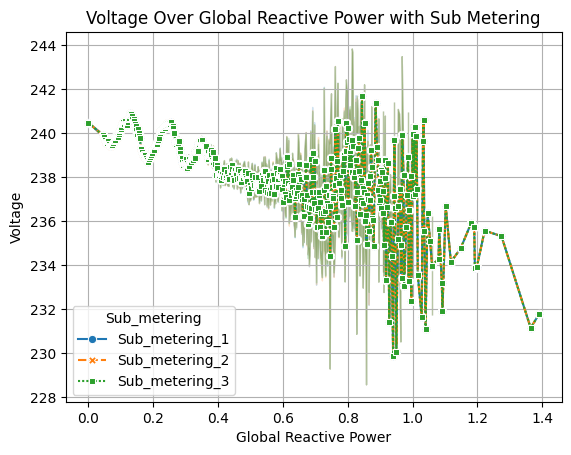

In [20]:
# Melt the DataFrame to long-form
melted_full_data = pd.melt(full_data.reset_index(),
                           id_vars=['Time', 'Global_reactive_power', 'Voltage'],
                           value_vars=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
                           var_name='Sub_metering',
                           value_name='Sub_metering_value')

# Plotting Voltage over Global_reactive_power with hues for sub-metering
sns.lineplot(data=melted_full_data,
             x='Global_reactive_power',
             y='Voltage',
             hue='Sub_metering',
             style='Sub_metering',
             markers=True)

# Adding title and labels
plt.title('Voltage Over Global Reactive Power with Sub Metering')
plt.xlabel('Global Reactive Power')
plt.ylabel('Voltage')

# Adding grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()


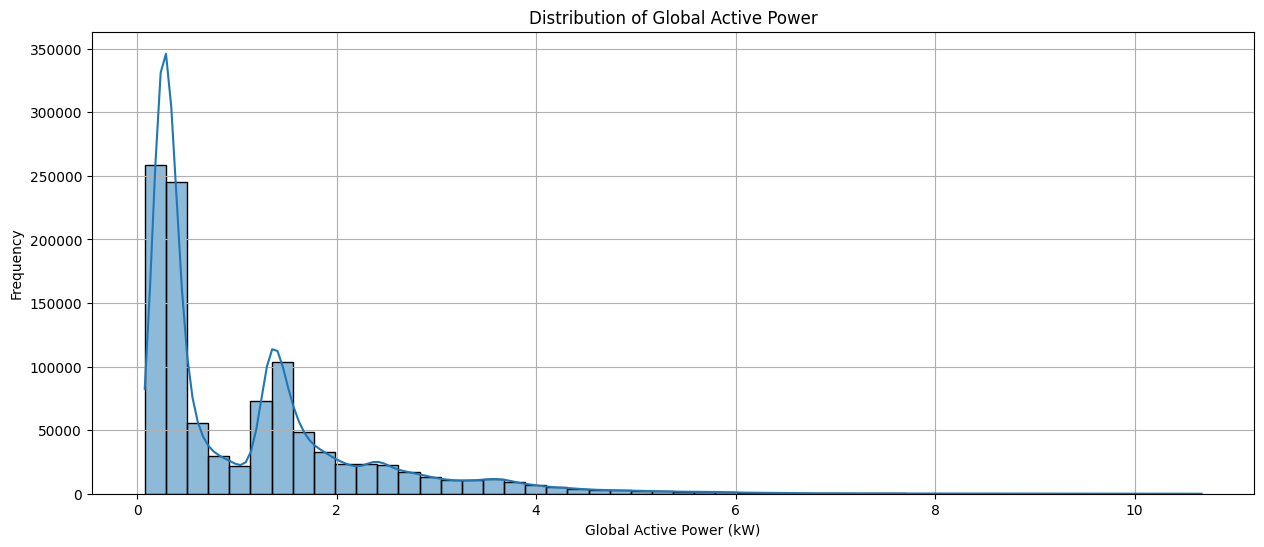

In [21]:
# Creating a histogram plot of Global_active_power using Seaborn

# Setting up the figure size
plt.figure(figsize=(15, 6))

# Creating a histogram with KDE (Kernel Density Estimate) overlay
sns.histplot(full_data['Global_active_power'], bins=50, kde=True)

# Adding title and labels
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')

# Adding grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()


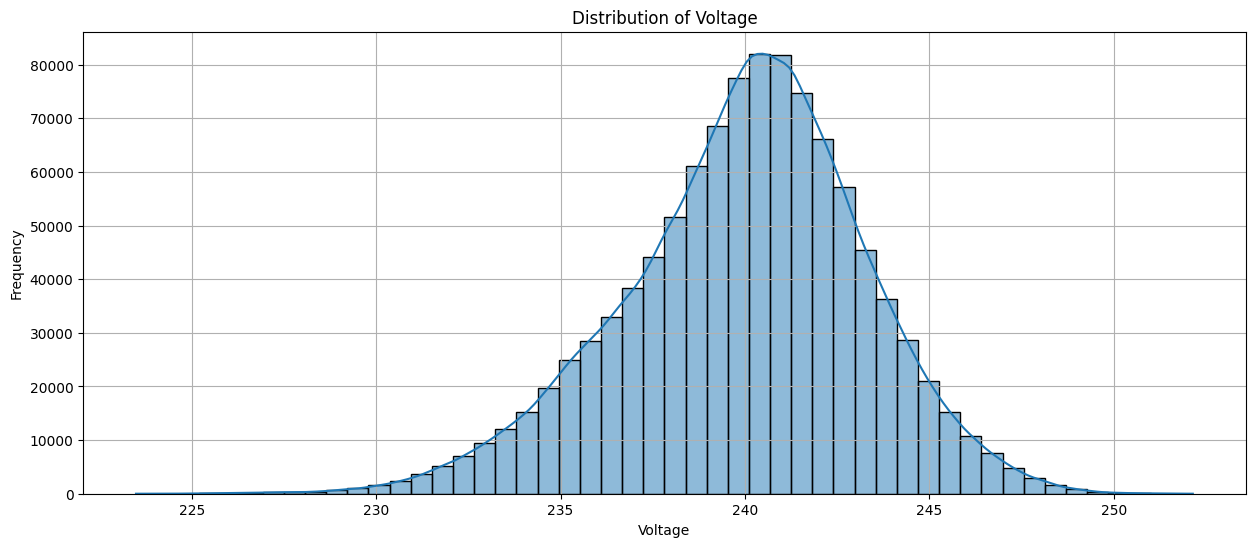

In [22]:
plt.figure(figsize=(15, 6))
sns.histplot(full_data['Voltage'], bins=50, kde=True)
plt.title('Distribution of Voltage')
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


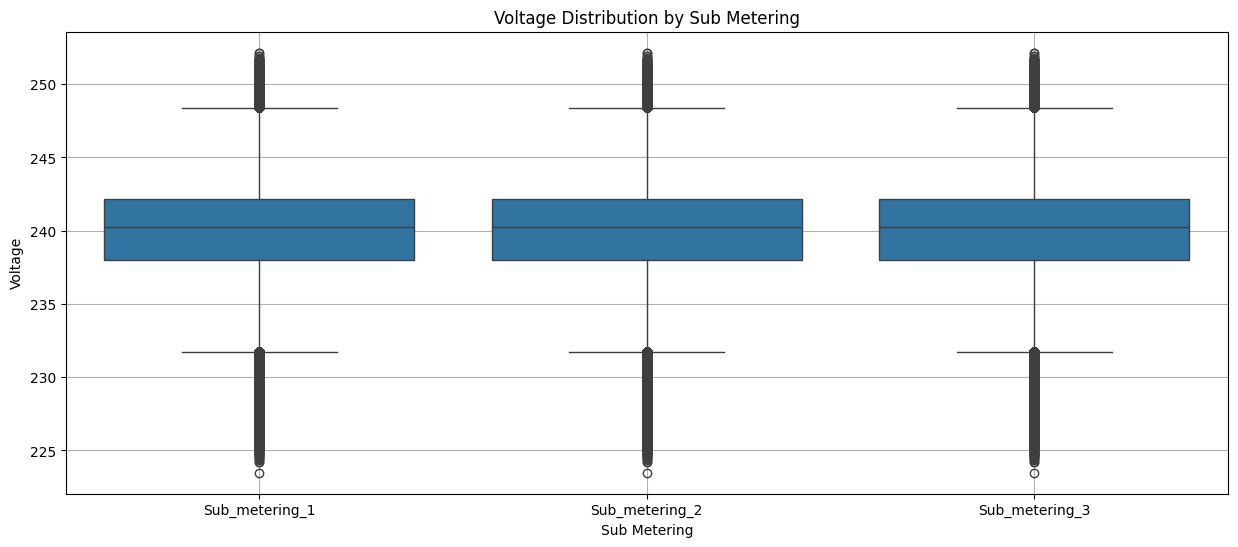

In [23]:
# Creating a boxplot of Voltage distribution by Sub_metering using Seaborn

# Setting up the figure size
plt.figure(figsize=(15, 6))

# Creating a boxplot
sns.boxplot(data=melted_full_data, x='Sub_metering', y='Voltage')

# Adding title and labels
plt.title('Voltage Distribution by Sub Metering')
plt.xlabel('Sub Metering')
plt.ylabel('Voltage')

# Adding grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()


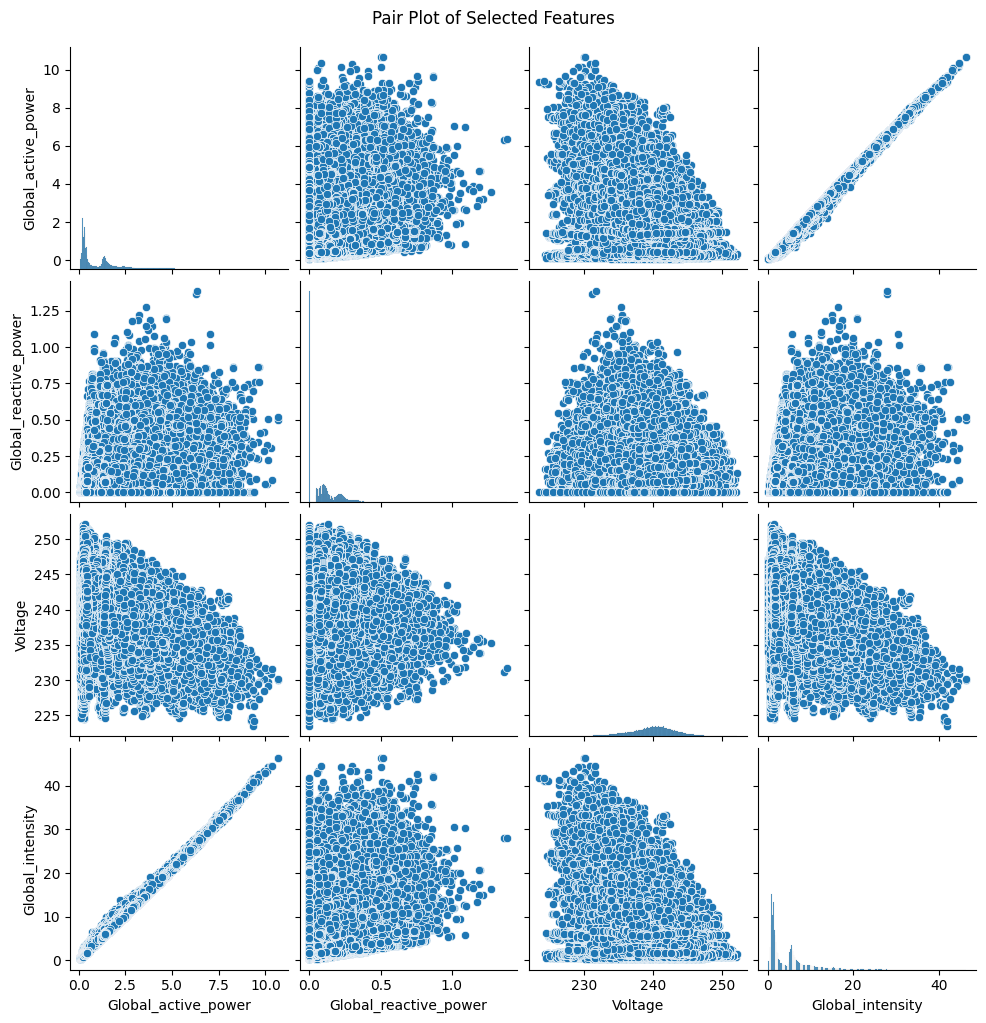

In [24]:
# Creating a pairplot of selected features using Seaborn

# Plotting pairplot for selected features
sns.pairplot(full_data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])

# Adding overall title with adjusted vertical position
plt.suptitle('Pair Plot of Selected Features', y=1.02)

# Displaying the plot
plt.show()


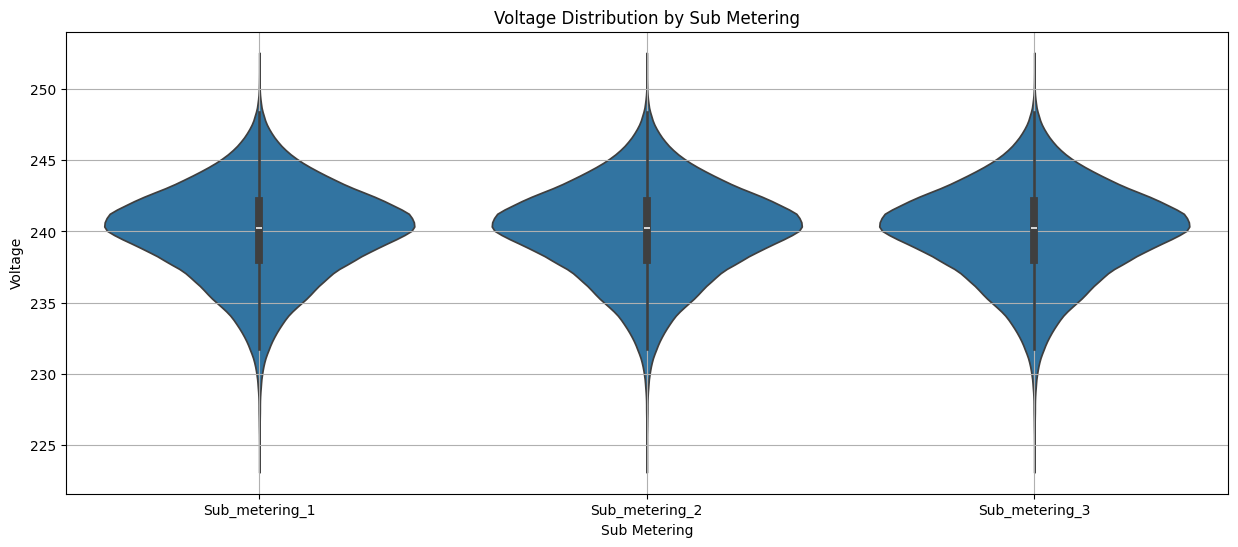

In [25]:
# Creating a violin plot of Voltage distribution by Sub_metering using Seaborn

# Setting up the figure size
plt.figure(figsize=(15, 6))

# Creating a violin plot
sns.violinplot(data=melted_full_data, x='Sub_metering', y='Voltage')

# Adding title and labels
plt.title('Voltage Distribution by Sub Metering')
plt.xlabel('Sub Metering')
plt.ylabel('Voltage')

# Adding grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()


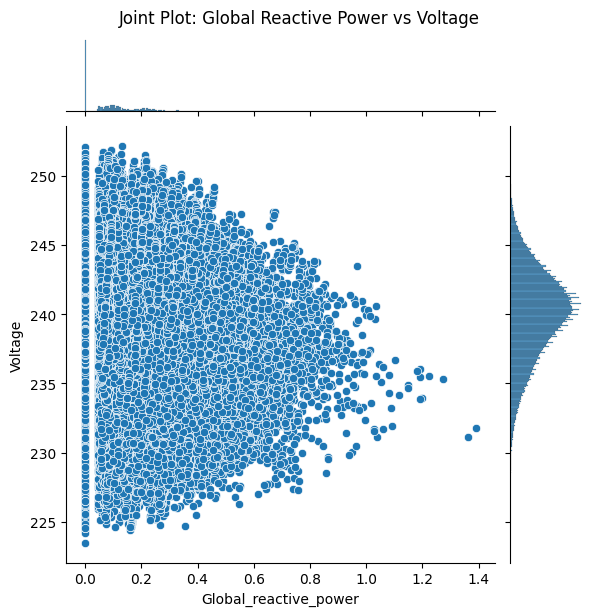

In [26]:
# Creating a joint plot of Global_reactive_power vs Voltage using Seaborn

# Plotting joint plot with scatter kind
sns.jointplot(x='Global_reactive_power', y='Voltage', data=full_data, kind='scatter')

# Adding overall title with adjusted vertical position
plt.suptitle('Joint Plot: Global Reactive Power vs Voltage', y=1.02)

# Displaying the plot
plt.show()


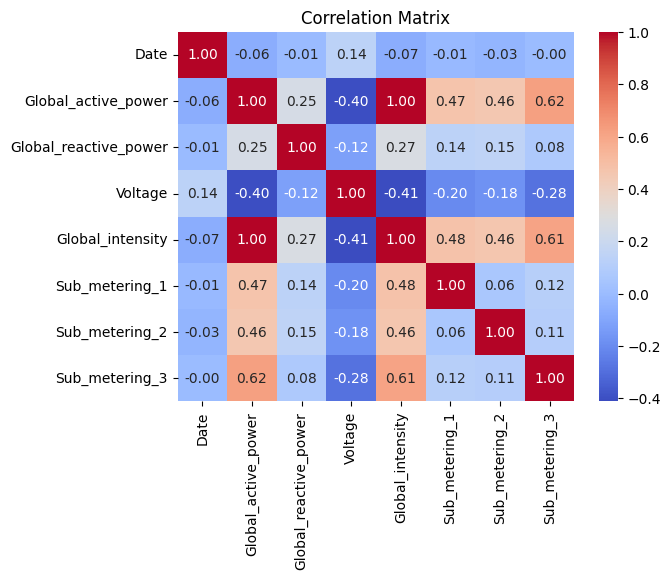

In [27]:
# Creating a heatmap to visualize correlations between features using Seaborn

# Plotting heatmap of correlations
sns.heatmap(full_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adding title
plt.title('Correlation Matrix')

# Displaying the plot
plt.show()


In [28]:
# Function to test stationarity using Dickey-Fuller test
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  # Run the Dickey-Fuller test
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value  # Extract and append critical values
    print(dfoutput)  # Print the results



In [ ]:
# Test stationarity of Global_active_power using the defined function
test_stationarity(full_data['Global_active_power'])

# Decompose time series to understand seasonality, trend, and residuals
decomposition = seasonal_decompose(full_data['Global_active_power'], model='additive', period=1)

# Plotting the decomposition results
plt.figure(figsize=(12, 6))

# Original series
plt.subplot(411)
plt.plot(full_data['Global_active_power'], label='Original')
plt.legend(loc='best')

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

# Residuals
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

# Adjusting layout for better presentation
plt.tight_layout()

# Plotting Autocorrelation and Partial Autocorrelation plots
plot_acf(full_data['Global_active_power'], lags=50)
plot_pacf(full_data['Global_active_power'], lags=50)

# Displaying all plots
plt.show()


Results of Dickey-Fuller Test:


In [ ]:
# Splitting data into train and test sets
train_size = int(len(df) * 0.8)  # Determine the size of the training set (80% of total data)
train, test = df.iloc[:train_size], df.iloc[train_size:]  # Split data into training and testing subsets

# ARIMA model
model = ARIMA(train['Global_active_power'], order=(5,1,0))  # Initialize ARIMA model with parameters (p,d,q)
model_fit = model.fit()  # Fit the ARIMA model to the training data
print(model_fit.summary())  # Print summary of the model fit


In [ ]:
# Forecasting using the fitted ARIMA model
fc, se, conf = model_fit.forecast(len(test))  # Generate forecasts, standard errors, and confidence intervals
fc_series = pd.Series(fc, index=test.index)  # Creating a series for forecasted values
lower_series = pd.Series(conf[:, 0], index=test.index)  # Lower bound of confidence intervals
upper_series = pd.Series(conf[:, 1], index=test.index)  # Upper bound of confidence intervals

# Plotting forecasts
plt.figure(figsize=(12, 5))
plt.plot(train['Global_active_power'], label='Training')  # Plotting training data
plt.plot(test['Global_active_power'], label='Testing')  # Plotting testing data
plt.plot(fc_series, label='Forecast', color='red')  # Plotting forecasted values
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)  # Filling confidence intervals
plt.title('ARIMA Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
# Evaluating the ARIMA model
mse = mean_squared_error(test['Global_active_power'], fc)  # Calculating mean squared error
rmse = np.sqrt(mse)  # Calculating root mean squared error from mean squared error
print(f'RMSE: {rmse}')  # Printing the root mean squared error
